Import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data collection and processing

In [ ]:
# loading csv data into pandas dataframe
gold_data=pd.read_csv('/content/gld_price_data.csv')

In [ ]:
# printing first 5 rows from the data set
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
# printing last 5 rows from the data set
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
# number of rows and cols
gold_data.shape

(2290, 6)

In [ ]:
# getting some basic information about dataset
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
# checking number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [ ]:
# getting statistical measures of dataset
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation
1) Positive Correlation
2) Negative Correlation

In [ ]:
correlation = gold_data.corr()

<Axes: >

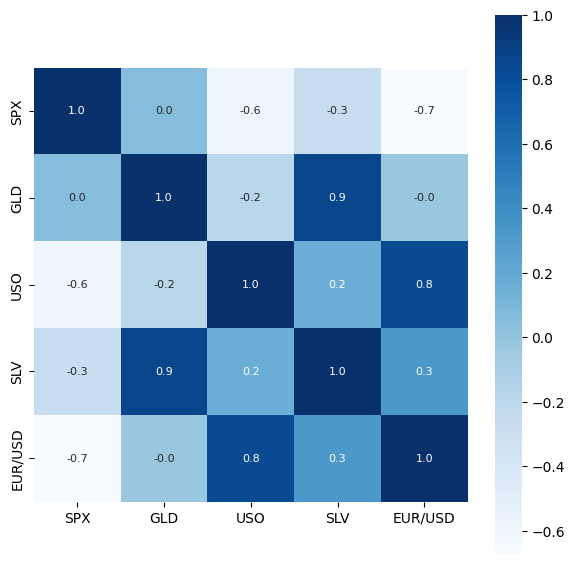

In [ ]:
# constructing heat map for understanding correlation
plt.figure(figsize=(7,7))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [ ]:
# correlation values of gold
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


Splitting the features and targets

In [ ]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y=gold_data['GLD']

In [ ]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [ ]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into training data and testing data

In [ ]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2,random_state=2)

Model Training: Random forest Regressor

In [ ]:
regressor=RandomForestRegressor(n_estimators=100)

In [ ]:
# training model
regressor.fit(X_train,Y_train)

Model Evaluation

In [ ]:
# predection on test data
test_data_pred=regressor.predict(X_test)

In [ ]:
print(test_data_pred)

[168.72829971  82.34329967 116.32729986 127.674201   120.66620115
 154.87419741 150.25199826 126.12470107 117.47039877 126.03040049
 116.62710097 171.55160077 141.91439825 167.92369884 115.13250011
 117.57540011 138.61220369 170.09030066 159.40620291 160.07719963
 154.97429968 124.96040029 175.87750012 157.44540286 125.07480059
  93.87889987  77.60340019 120.68320015 119.0840994  167.50389923
  88.21020099 125.39690017  91.19580046 117.77120013 121.10929931
 136.57750094 115.56180155 115.42950045 149.1125995  107.2773011
 104.37820239  87.2663983  126.49570068 117.96609988 152.86719881
 119.52130014 108.28239987 107.85229869  93.16780081 127.069798
  75.50730035 113.69199938 121.14450034 111.2167989  118.98219916
 120.8351992  159.05769983 169.35660125 147.07619672  85.74959817
  94.42040011  86.93429838  90.35350013 119.09720038 126.46090087
 127.58699989 170.58309965 122.25919923 117.47029858  98.85790012
 168.55060184 142.9174981  132.46860291 121.20490203 120.64609957
 119.94530041

In [ ]:
# R squared Error
error_score=metrics.r2_score(Y_test,test_data_pred)

In [ ]:
print("R squared erro",error_score)

R squared erro 0.9892903642924052


comparing actual values and pridicted values in plot

In [ ]:

Y_test=list(Y_test)

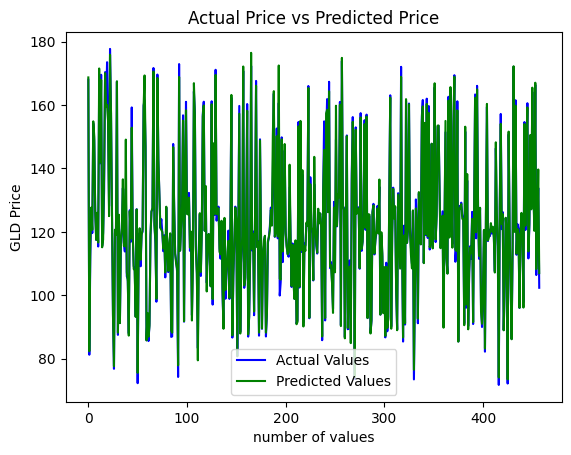

In [ ]:
plt.plot(Y_test,color='blue',label='Actual Values')
plt.plot(test_data_pred, color='green',label='Predicted Values')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()